In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



# 1.PROBLEM STATEMENT

In [22]:
titanic=pd.read_csv(r"C:\Users\MALAR\Desktop\niketha\titanic.csv")

In [23]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# DATA GATHERING

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
titanic.shape

(891, 12)

# EDA

In [27]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [30]:
titanic.drop_duplicates(inplace=True)

In [35]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
titanic.drop(['Ticket'],axis=1,inplace=True)

In [39]:
titanic.drop(['Fare'],axis=1,inplace=True)

In [41]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [42]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [43]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
titanic['Embarked'].isna().sum()

2

In [47]:
titanic=pd.get_dummies(titanic,columns=['Embarked'])

In [48]:
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,1,0,0


In [50]:
titanic.replace({True:1,False:0},inplace=True)

In [51]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,1,0,0


# ANALYSING DATA

<AxesSubplot:xlabel='Survived', ylabel='count'>

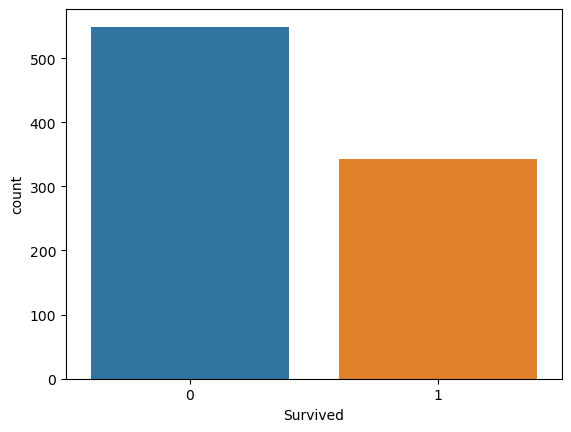

In [23]:
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

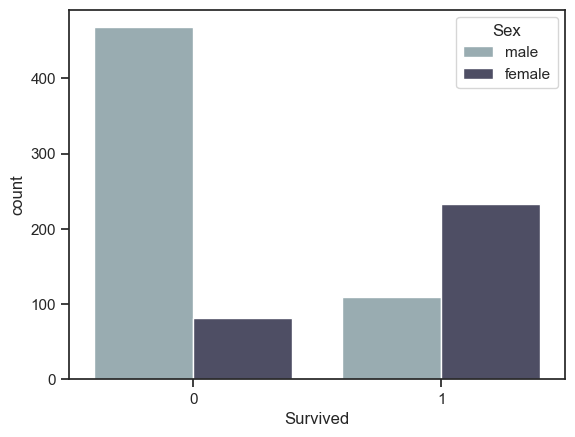

In [42]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='bone_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

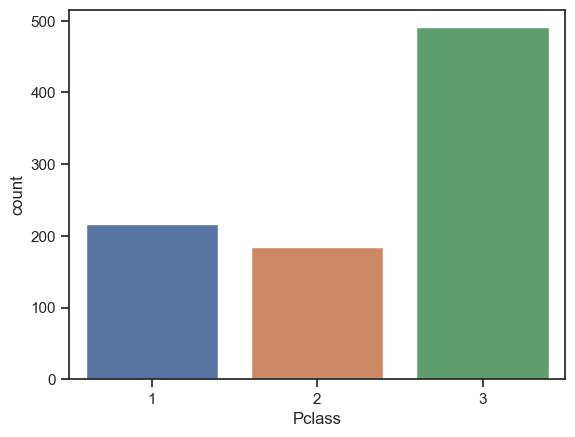

In [41]:
sns.set(style='ticks')
sns.countplot(x='Pclass',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

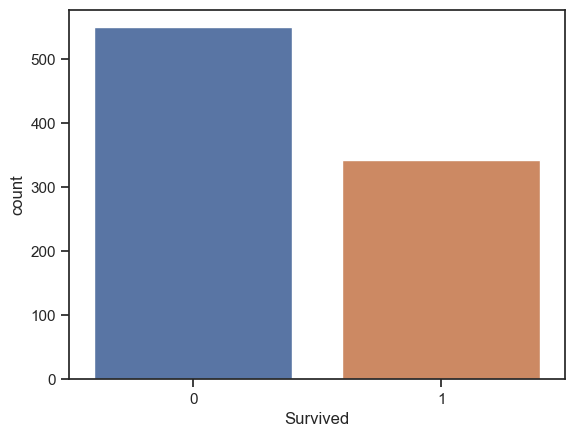

In [44]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

# TRAINING MODEL

In [70]:
features=['Pclass','Sex','Age','SibSp','Parch']
X=pd.get_dummies(titanic[features],columns=['Sex'],drop_first=True)
y=titanic['Survived']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
predictions=model.predict(X_test)

In [79]:
accuracy=accuracy_score(y_test,predictions)
conf_matrix=confusion_matrix(y_test,predictions)
classification_rep=classification_report(y_test,predictions)


In [80]:
(f'Accuracy:{accuracy}')

'Accuracy:0.8268156424581006'

In [81]:
(f'confusion Matrix:\n{conf_matrix}')

'confusion Matrix:\n[[93 12]\n [19 55]]'

In [82]:
(f'classification Report:\n{classification_rep}')

'classification Report:\n              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86       105\n           1       0.82      0.74      0.78        74\n\n    accuracy                           0.83       179\n   macro avg       0.83      0.81      0.82       179\nweighted avg       0.83      0.83      0.83       179\n'